# RGB Classification data set

In [60]:
import zipfile
import tensorflow as tf
import os
from keras.utils import image_dataset_from_directory
import shutil
from keras.applications import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomBrightness, RandomTranslation, Input
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import random
import numpy as np


In [4]:
# Check if we have access to GPU
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Becoming one with the data

In [3]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("dogs-vs-cats.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("test1.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("train.zip")
zip_ref.extractall()
zip_ref.close()

In [8]:
def split_images_by_prefix(source_dir, destination_dir_1, destination_dir_2, prefix):
    # Créer les dossiers de destination s'ils n'existent pas déjà
    os.makedirs(destination_dir_1, exist_ok=True)
    os.makedirs(destination_dir_2, exist_ok=True)

    # Parcourir les fichiers du dossier source
    for filename in os.listdir(source_dir):
            source_filepath = os.path.join(source_dir, filename)
            if os.path.isfile(source_filepath):
            # Vérifier si le nom du fichier commence par le préfixe
                if filename.startswith(prefix):
                    destination_filepath = os.path.join(destination_dir_1, filename)
                else:
                    destination_filepath = os.path.join(destination_dir_2, filename)

                # Copier le fichier vers le dossier de destination approprié
                shutil.copyfile(source_filepath, destination_filepath)

In [9]:
split_images_by_prefix("train", "train/cat", "train/dog", "cat")

In [61]:
train_dir = "train"
test_dir = "test1"
input_shape = (224, 224)
batch_size = 32

train_dataset, val_dataset = image_dataset_from_directory(train_dir,
                                                          batch_size=batch_size,
                                                          image_size=input_shape,
                                                          validation_split=0.2,
                                                          subset="both",
                                                          seed=42, 
                                                          label_mode="binary",
                                                          labels="inferred",
                                                          color_mode="rgb")  

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Using 5000 files for validation.


In [3]:
plot_losses = PlotLossesKeras()

In [4]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomContrast(0.2),
    RandomBrightness(0.2),
])

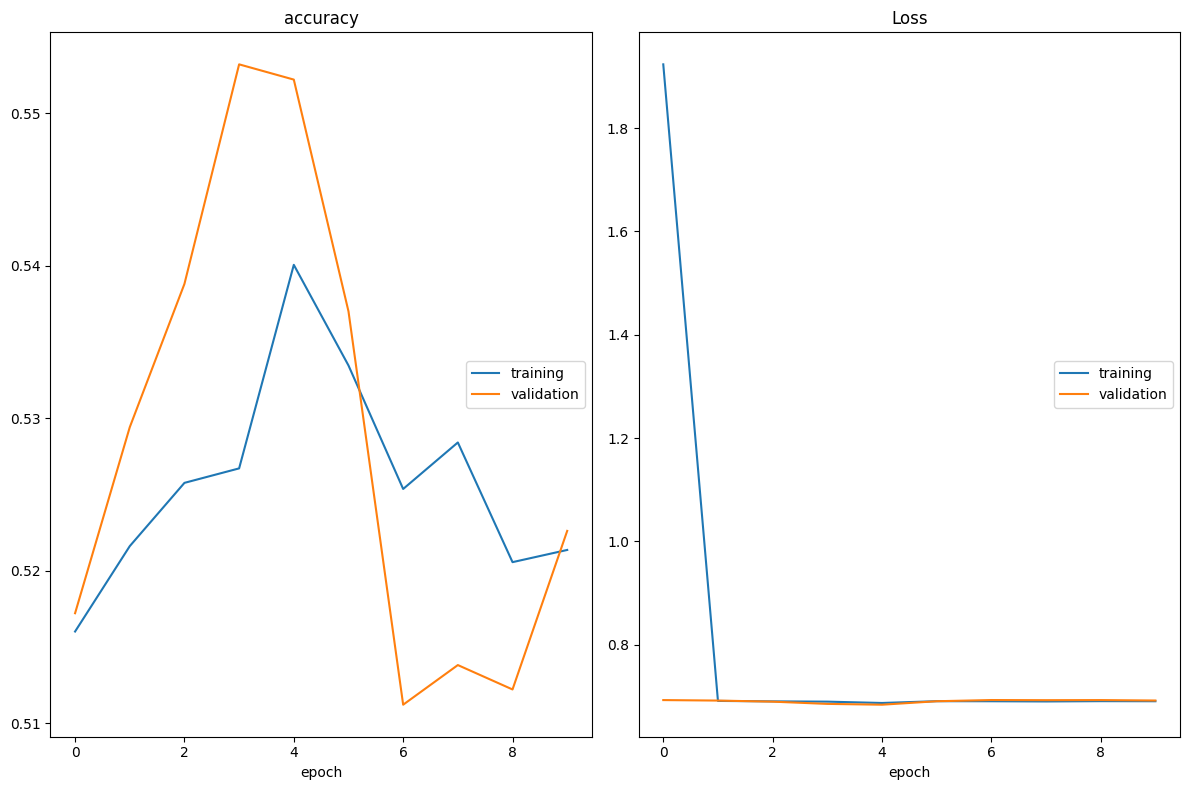

accuracy
	training         	 (min:    0.516, max:    0.540, cur:    0.521)
	validation       	 (min:    0.511, max:    0.553, cur:    0.523)
Loss
	training         	 (min:    0.687, max:    1.924, cur:    0.690)
	validation       	 (min:    0.684, max:    0.693, cur:    0.692)
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.5159 - loss: 0.6905 - val_accuracy: 0.5226 - val_loss: 0.6917


In [7]:
model = Sequential([ 
    data_augmentation,
    Conv2D(32, (3, 3), activation="relu", input_shape=input_shape + (3,)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),  
    Dropout(0.2),
    Flatten(),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

hist = model.fit(train_dataset, 
                 epochs=10, 
                 validation_data=val_dataset,
                 callbacks=[EarlyStopping(patience=10), plot_losses])



In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)      │        896 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)      │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)        │     36,928 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 64)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 43264)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 1)                 │     43,265 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 298,757 (1.14 MB)

 Trainable params: 99,585 (389.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 199,172 (778.02 KB)

In [9]:
# unbach valdataset
labels = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())

In [11]:
pred = model.predict(val_dataset)

  1/157 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [14]:
report = classification_report(labels, pred.round())

In [15]:
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.05      0.09      2462
         1.0       0.52      0.98      0.68      2538

    accuracy                           0.52      5000
   macro avg       0.62      0.52      0.38      5000
weighted avg       0.62      0.52      0.39      5000



In [16]:
# Count the number of files in each directory
# Specify the directory path
directory = "train"

# Initialize a dictionary to store the count of files in each directory
file_count = {}

# Iterate over the directories
for root, dirs, files in os.walk(directory):
    # Count the number of files in the current directory
    count = len(files)
    
    # Store the count in the dictionary
    file_count[root] = count

# Print the count of files in each directory
for directory, count in file_count.items():
    print(f"{directory}: {count} files")


train: 25000 files
train/dog: 12500 files
train/cat: 12500 files


## Training the model with pre-trained VGG16

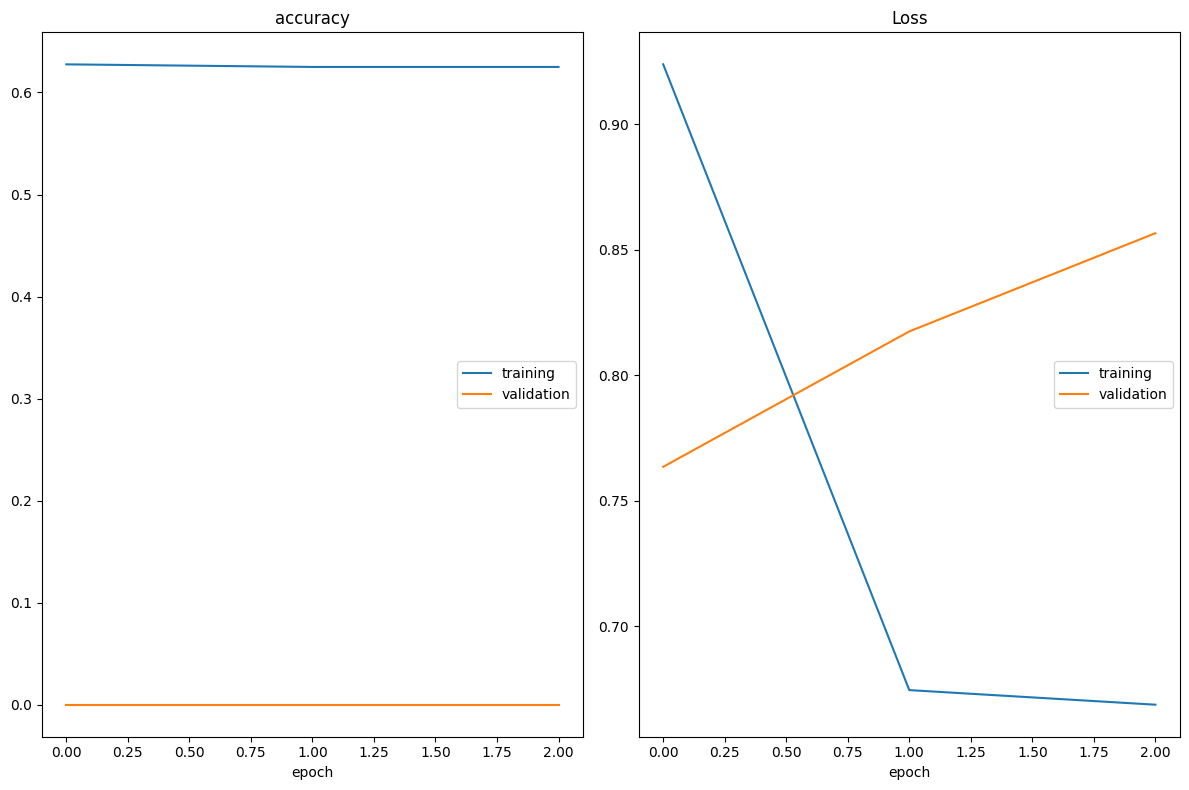

accuracy
	training         	 (min:    0.625, max:    0.628, cur:    0.625)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
Loss
	training         	 (min:    0.669, max:    0.924, cur:    0.669)
	validation       	 (min:    0.763, max:    0.857, cur:    0.857)
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.6195 - loss: 0.6706 - val_accuracy: 0.0000e+00 - val_loss: 0.8566
Epoch 4/20
284/625 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.5900 - loss: 0.6774

KeyboardInterrupt: 

In [5]:
# load model
model_trained = VGG16(include_top=False)
 # mark loaded layers as not trainable
for layer in model_trained.layers:
   layer.trainable = False

 # add new classifier layers
inputs = Input(shape=(224, 224, 3))
data_augmented = data_augmentation(inputs)
vgg_output = model_trained(data_augmented, training=False)
flat1 = Flatten()(vgg_output)
class1 = Dense(32, activation='relu')(flat1)
outputs = Dense(1, activation='sigmoid')(class1)
# define new model
model_custom = Model(inputs=inputs, outputs=outputs)

# compile model
model_custom.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

# fit model
hist = model_custom.fit(train_dataset,
                         epochs=20,
                         validation_data=val_dataset,
                         callbacks=[EarlyStopping(patience=10), plot_losses])

In [16]:
model_custom.save('model_custom.keras')

In [3]:
# load model
model_custom = load_model('model_custom.keras')

/home/joachim/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:355: UserWarning: Skipping variable loading for optimizer 'adam', because it has 62 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [8]:
# summarize
model_custom.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)         │ 14,714,688 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 25088)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 32)                │    802,848 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │         33 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 46,552,709 (177.58 MB)

 Trainable params: 15,517,569 (59.19 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,035,140 (118.39 MB)

In [66]:
pred = model_custom.predict(val_dataset)

157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 145ms/step


In [67]:
# unbach valdataset
labels = []
images = []
for image, label in val_dataset.unbatch():
    labels.append(label.numpy())
    images.append(image.numpy())

In [69]:
accuracy_score(labels, pred.round())

0.9776

In [70]:
report = classification_report(labels, pred.round())
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2462
         1.0       0.97      0.98      0.98      2538

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



In [8]:
classes = ["cat", "dog"]

In [27]:
def plot_images(images, pred, labels=None):
    plt.figure(figsize=(23, 30))
    random_number = random.randint(0, len(pred))
    if labels is not None:
        for index, (image, prediction, label) in enumerate(zip(images[random_number:random_number+35], pred[random_number:random_number+35], labels[random_number:random_number+35])):
            if int(prediction.item()) == int(label.item()):
                plt.subplot(7, 5, index+1)
                plt.imshow(image/255.)
                plt.title(f"Predicted: {classes[int(prediction.item())]}\nTrue: {classes[int(label.item())]}", color="green") 
                plt.axis("off")
            else:
                plt.subplot(7, 5, index+1)
                plt.imshow(image/255.)
                plt.title(f"Predicted: {classes[int(prediction.item())]}\nTrue: {classes[int(label.item())]}", color="red") 
                plt.axis("off")
    else:
        for index, (image, prediction) in enumerate(zip(images[random_number:random_number+15], pred[random_number:random_number+15])):
            plt.subplot(3, 5, index+1)
            plt.imshow(image)
            plt.title(f"Predicted: {classes[int(prediction)]}")
            plt.axis("off")

In [ ]:
plot_images(images, np.array(pred, dtype=int), np.array(labels, dtype=int))

In [59]:
images_test_pred = []
images_test = []
# Create test dataset
for test_filename in os.listdir("test1"):
    test_filepath = os.path.join("test1", test_filename)
    img = tf.io.read_file(test_filepath)
    img = tf.io.decode_image(img, channels=3)
    img_test_array = tf.image.resize(img, [224, 224])
    images_test_batch = np.expand_dims(img_test_array, axis=0)
    img_test_array = images_test_batch / 255.
    images_test.append(img_test_array)
    pred_custom = model_custom.predict(img_test_array)
    images_test_pred.append(pred_custom.round())


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [71]:
plot_images(np.squeeze(images_test), images_test_pred)

In [63]:
images_test_pred = np.array(images_test_pred)

In [64]:
j = 0
for i in images_test_pred[images_test_pred == 0]:
    j += 1
print(f"Number of cat predicted: {j}")
print(f"Number of total images: {len(images_test_pred)}")

Number of cat predicted: 11789
Number of total images: 12500


In [68]:
i = 0
n_image = 0
for prediction, label in zip(pred, labels):
    if int(prediction.item()) == int(label.item()):
        i += 1
    n_image += 1
print(f"Number of correctly predicted images: {i}")
print(f"Number of total images: {n_image}")
print(f"Accuracy: {i/n_image}")
      

Number of correctly predicted images: 3527
Number of total images: 5000
Accuracy: 0.7054
